# Michelin Rated Restaurants in France - Analysis

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

----
## We load in the departmental GeoJSON data and remove the geographical columns

In [20]:
# Load GeoJSON departmental data
departments = gpd.read_file("../../data/France/department_restaurants.geojson")
departments = departments.drop(columns=['bib_gourmand', '1_star', '2_star', '3_star', 'total_restaurants', 'locations', 'geometry'])

In [21]:
# We exclude Paris
no_paris = departments[departments['department'] != 'Paris']
departments.head(3)

,code,department,region,total_stars,poverty_rate(%),average_annual_unemployment_rate(%),average_net_hourly_wage(€),municipal_population,population_density(inhabitants/sq_km),area(sq_km)
0,01,Ain,Auvergne-Rhône-Alpes,7,10.5,5.5,15.34,657856.0,114.2,5760.56
1,02,Aisne,Hauts-de-France,0,18.0,10.5,13.92,529374.0,71.9,7362.64
2,03,Allier,Auvergne-Rhône-Alpes,2,15.3,7.7,13.63,335628.0,45.7,7344.16


----
&nbsp;
## Pairplots at Regional Level

In [37]:
regions = departments.region.unique().tolist()
print(f"Unique Regions: {regions}")

Unique Regions: ['Auvergne-Rhône-Alpes', 'Hauts-de-France', "Provence-Alpes-Côte d'Azur", 'Corse', 'Grand Est', 'Occitanie', 'Normandie', 'Nouvelle-Aquitaine', 'Centre-Val de Loire', 'Bourgogne-Franche-Comté', 'Bretagne', 'Pays de la Loire', 'Île-de-France']


### Southern France

Departments: 43


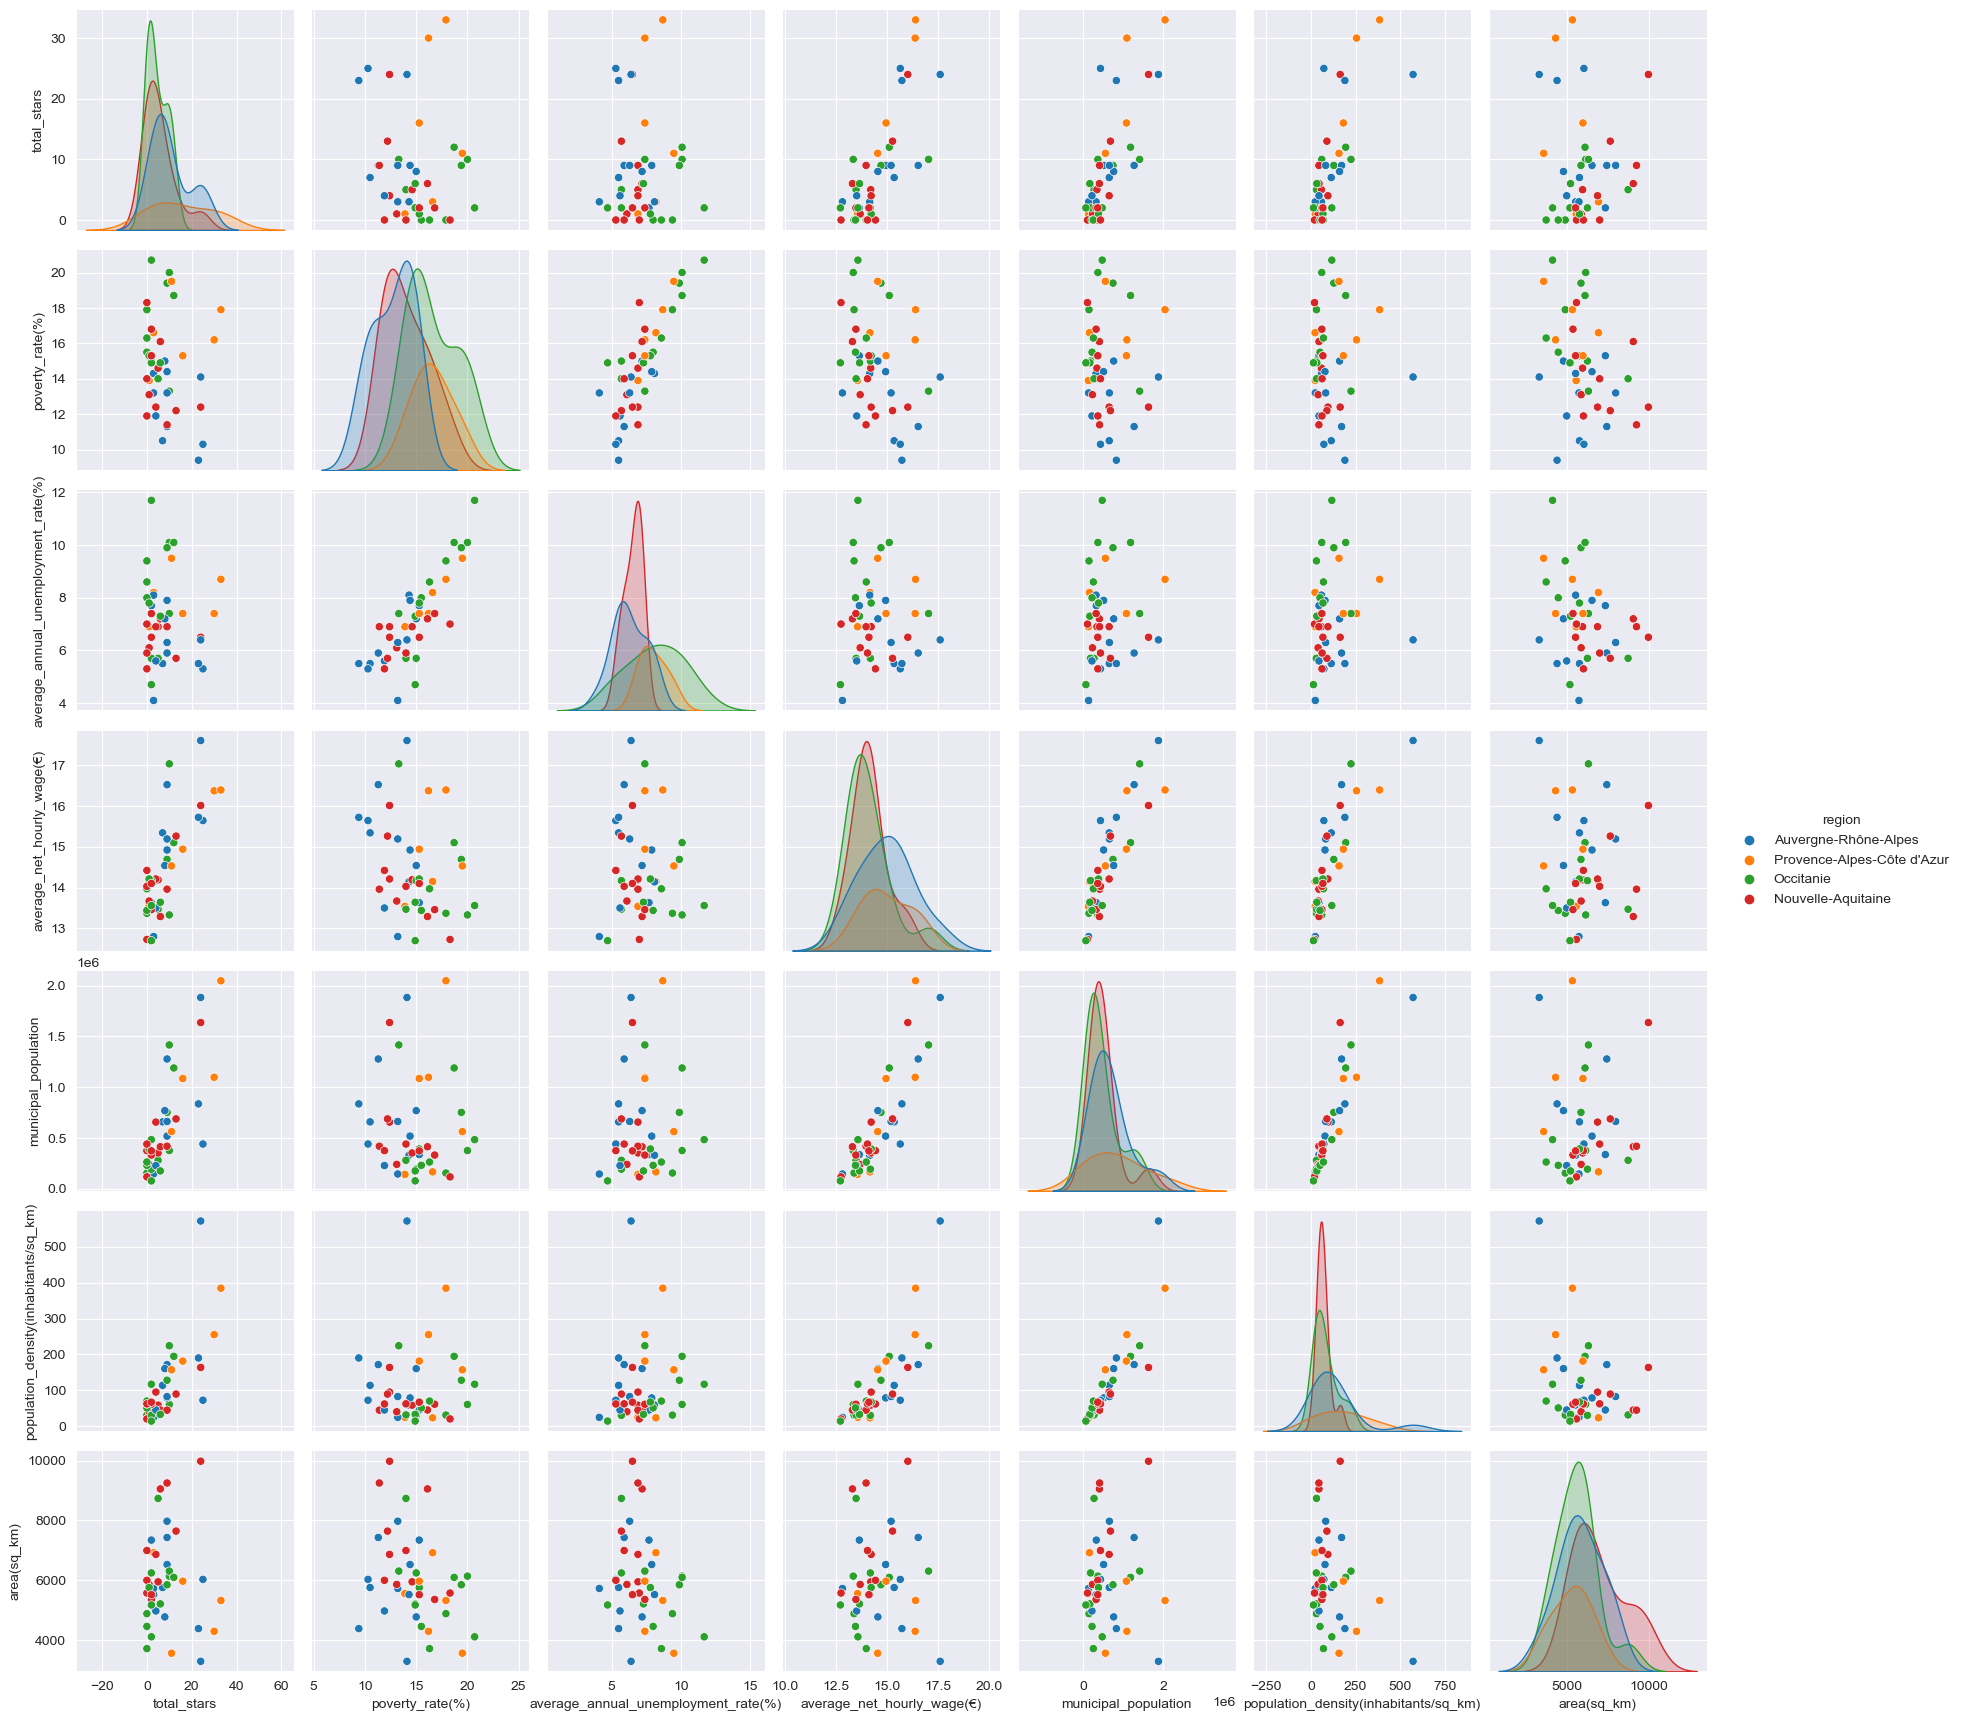

In [55]:
# Excluding Corsica
south = departments[departments['region'].isin(["Provence-Alpes-Côte d'Azur", 'Occitanie', 'Nouvelle-Aquitaine', 'Auvergne-Rhône-Alpes'])]
print(f"Departments: {south.department.nunique()}")
sns.pairplot(south, hue='region')

### Northern France

In [62]:
s_regions = set(south.region.unique().tolist())
all_regions = set(regions)
n_regions = all_regions - s_regions
print(n_regions)

{'Grand Est', 'Île-de-France', 'Centre-Val de Loire', 'Hauts-de-France', 'Bourgogne-Franche-Comté', 'Pays de la Loire', 'Bretagne', 'Corse', 'Normandie'}


We create two sets of data for the "North" with and without Paris

In [66]:
north = departments[departments['region'].isin(['Grand Est', 'Île-de-France', 'Centre-Val de Loire', 'Hauts-de-France', 'Bourgogne-Franche-Comté', 'Pays de                                                 la Loire', 'Bretagne', 'Normandie'])]
north_no_paris = no_paris[no_paris['region'].isin(['Grand Est', 'Île-de-France', 'Centre-Val de Loire', 'Hauts-de-France', 'Bourgogne-Franche-Comté', 'Pays                                                 de la Loire', 'Bretagne', 'Normandie'])]

Departments: 46


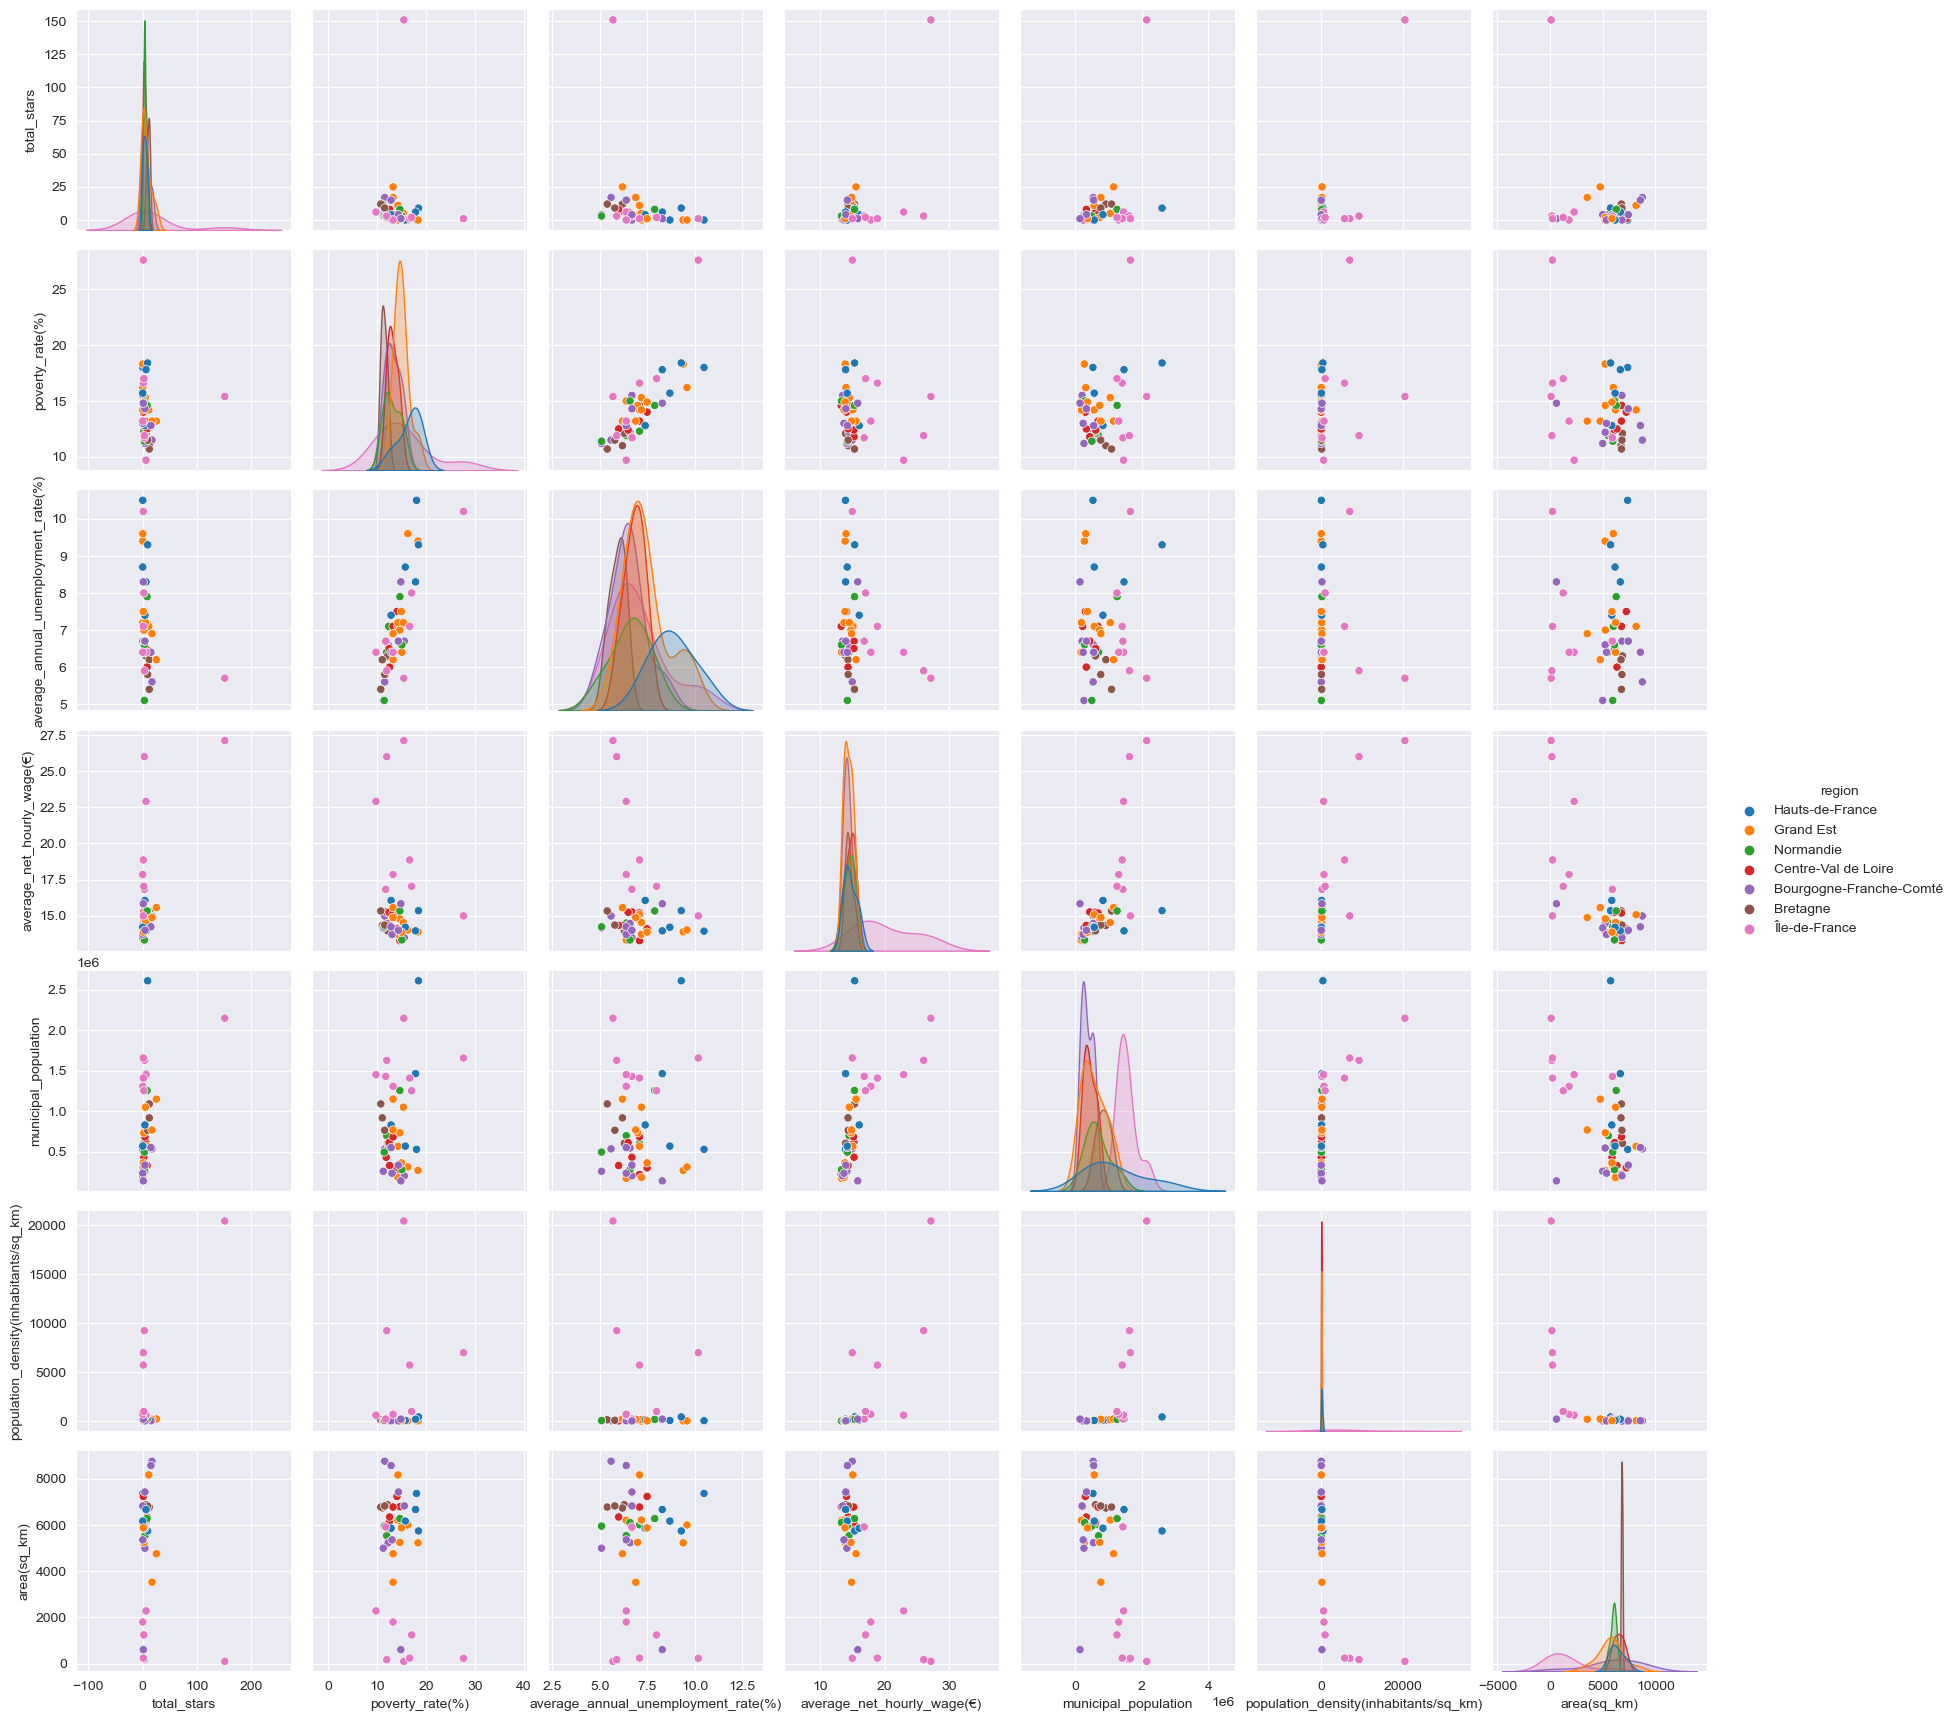

In [67]:
print(f"Departments: {north.department.nunique()}")
sns.pairplot(north, hue='region')

There is one data point for Île-de-France with appears to be Paris 75

Departments: 45


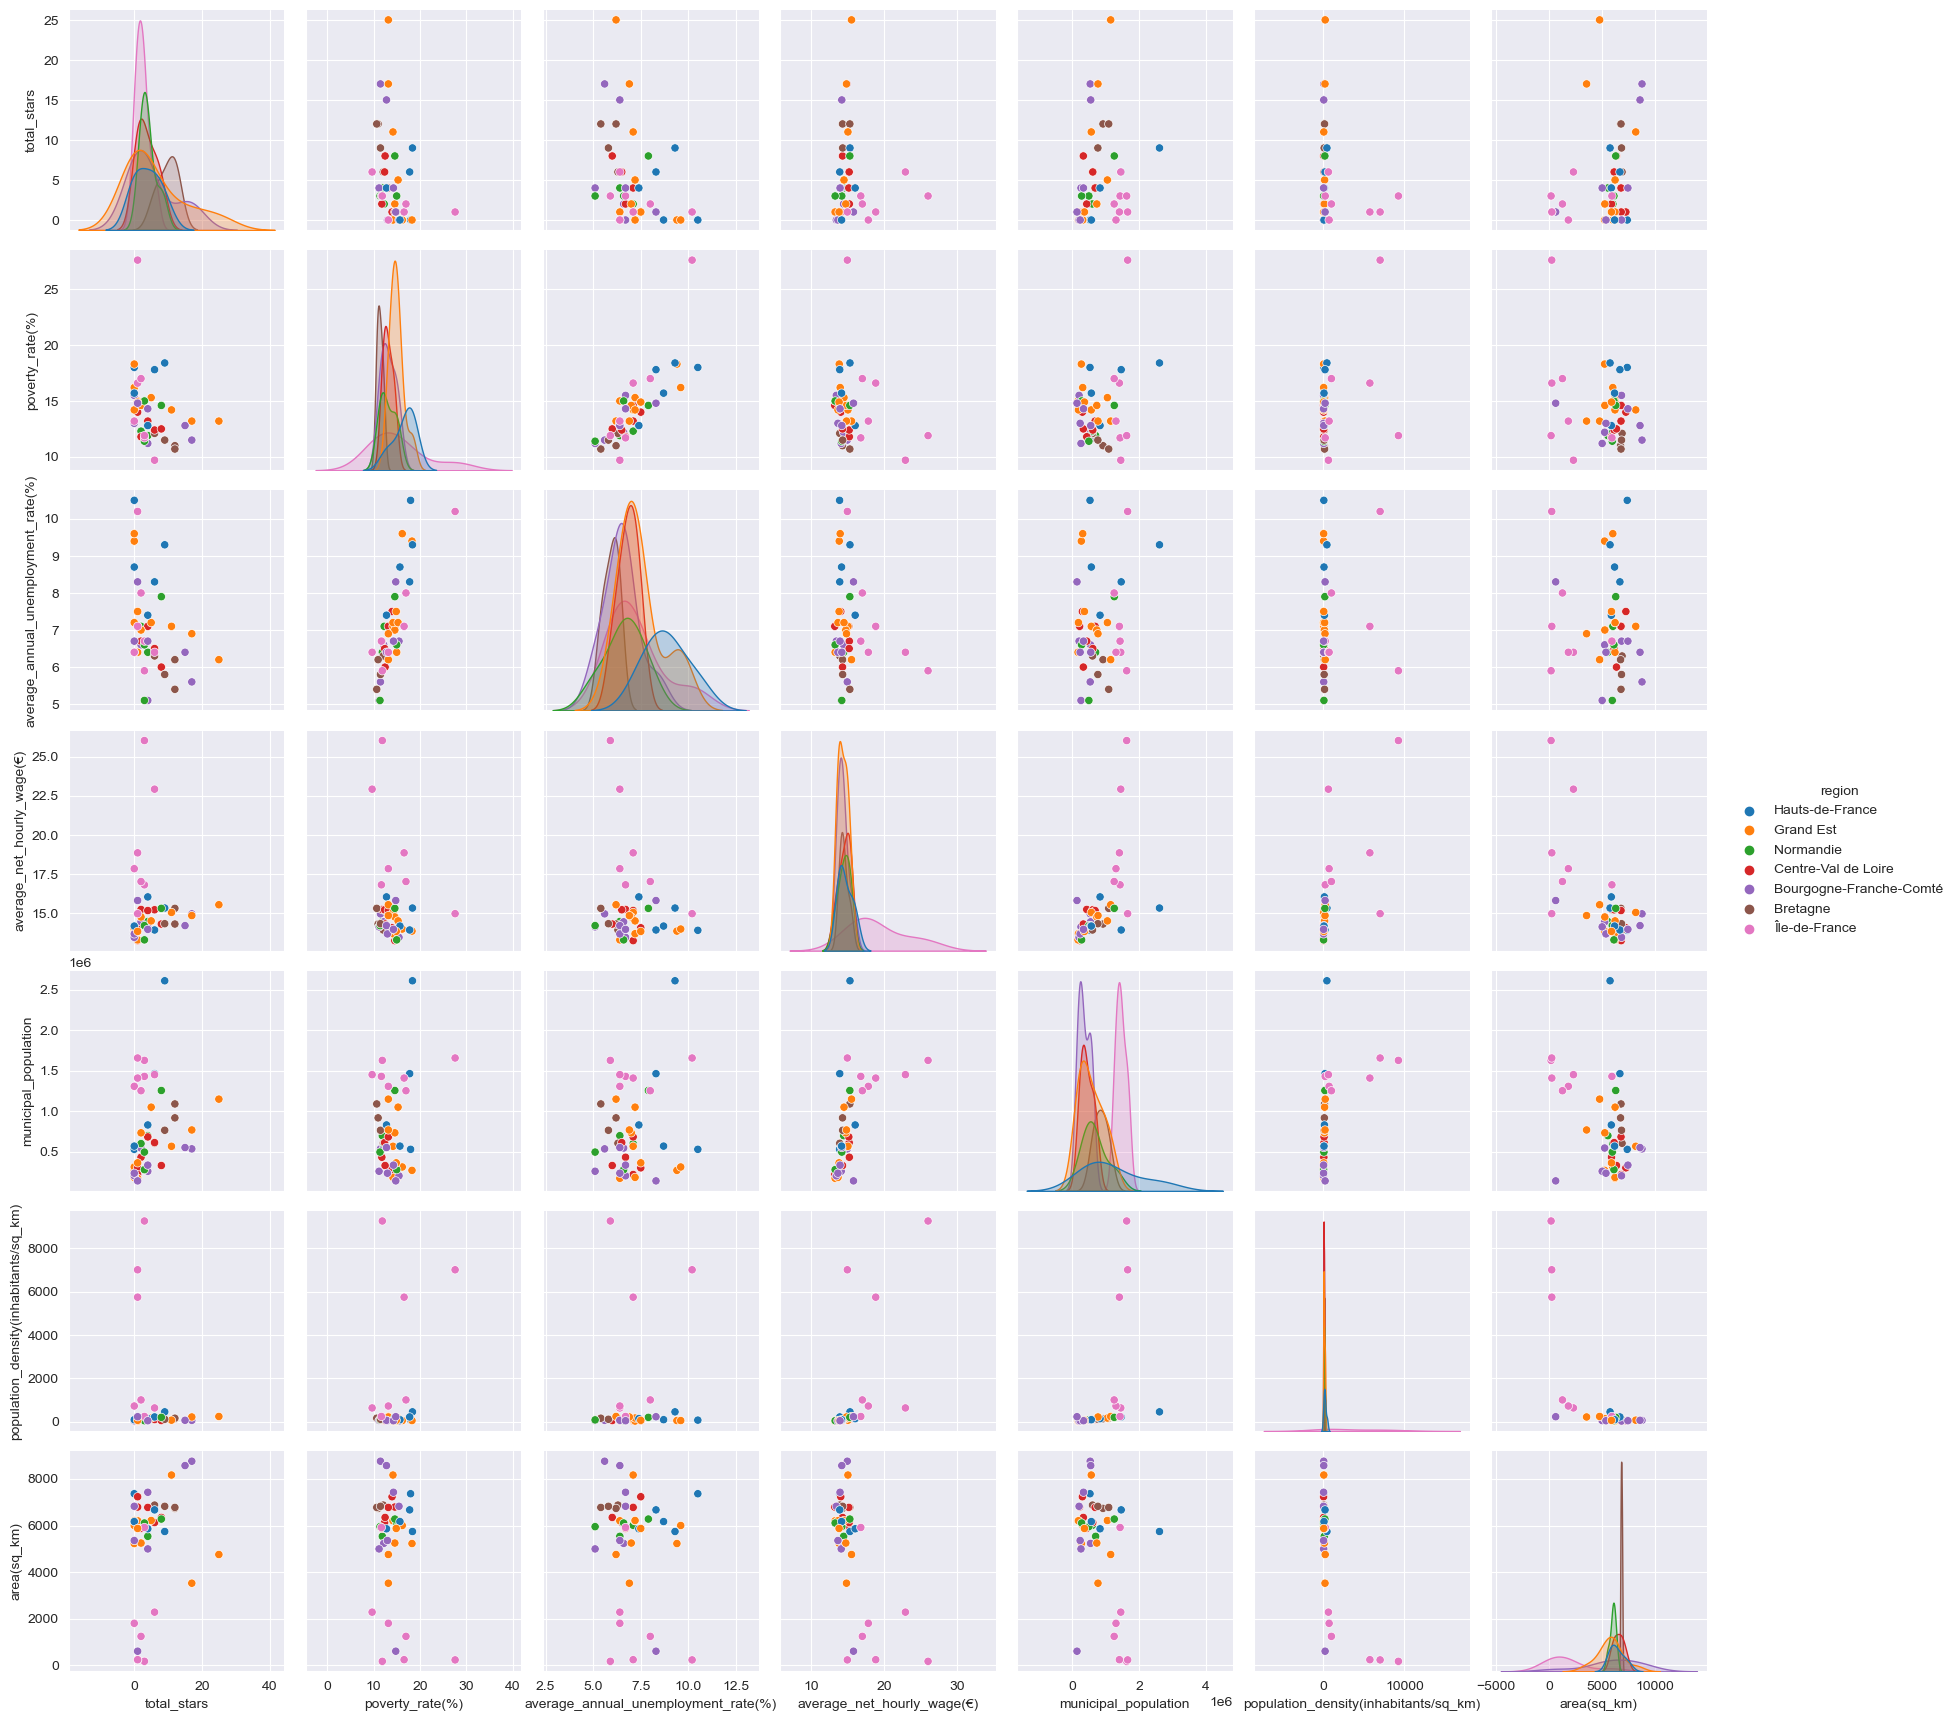

In [68]:
print(f"Departments: {north_no_paris.department.nunique()}")
sns.pairplot(north_no_paris, hue='region')

----
&nbsp;
## Correlation Matrices